# Surface plotting of FPN and clusters within FPN

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image, surface, datasets
from nilearn.plotting import plot_surf_contours
import hcp_utils as hcp
import nibabel as nib

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/tmp/ipykernel_3867618/163874973.py:46: UserWarning: hemi='left' was passed with type(roi_map)=<class 'numpy.ndarray'> and type(surf_mesh)=<class 'tuple'>.
This value will be ignored as it is only used when 'roi_map' is a SurfaceImage instance and  / or 'surf_mesh' is a PolyMesh instance.
  plot_surf_contours(


TypeError: plot_surf() got an unexpected keyword argument 'color'

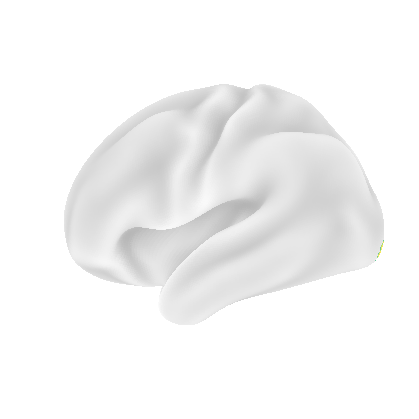

In [ ]:
# Load the Glasser atlas NIfTI file
glasser_atlas_path = '/home/hmueller2/Downloads/glasser360-master/glasser360MNI.nii.gz'
glasser_atlas = nib.load(glasser_atlas_path)

# Assuming hcp is already defined and imported
mmp_greyordinates = hcp.mmp.map_all
mmp_labels = hcp.mmp.labels
mmp_ids = hcp.mmp.ids

Xp = np.empty((len(mmp_labels)))
Xp.fill(0)

# Placeholder values for undefined variables
tmp_ttest = [1.0]  # Replace with actual t-test result
tmp_id = 1  # Replace with actual ID
min_thresh = 0.1  # Replace with actual minimum threshold
max_thresh = 1.0  # Replace with actual maximum threshold
ax = None  # Replace with actual axis object
fig = None  # Replace with actual figure object
cm = 'viridis'  # Replace with actual colormap

Xp[tmp_id - 1] = tmp_ttest[0]  # Filling a label that is used later

# Project the Glasser atlas data onto the brain surface
glasser_surf = surface.vol_to_surf(glasser_atlas, hcp.mesh.inflated)

# Plot the statistical map
plotting.plot_surf_stat_map(
    hcp.mesh.inflated,
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)),
    hemi='left',
    view='lateral',
    colorbar=False,
    threshold=min_thresh,
    vmax=max_thresh,
    bg_map=hcp.mesh.sulc,
    bg_on_data=True,
    darkness=0.3,
    axes=ax,
    figure=fig,
    cmap=cm,
    symmetric_cbar=True
)

# Add contours to the plot
plot_surf_contours(
    hcp.mesh.inflated,
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)),
    levels=[0.5],  # Adjust levels as needed
    hemi='left',
    view='lateral',
    figure=fig,
    axes=ax,
    color='red'
)

In [16]:
# Load the Glasser atlas NIfTI file
glasser_atlas_path = '/home/hmueller2/Downloads/glasser360-master/glasser360MNI.nii.gz'
glasser_atlas = nib.load(glasser_atlas_path)

# Load the FPN parcellation key file
file_path = '/home/hmueller2/Downloads/FPN_parcellation_cole/CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract the 'GLASSERLABELNAME' of rows that have 7 as 'NETWORKKEY'
glasser_labels_FPN = []
for line in lines[1:]:  # Skip the header line
    parts = line.strip().split()
    if len(parts) > 11 and parts[9] == '7':  # 'NETWORKKEY' is the 10th column (index 9)
        glasser_labels_FPN.append(parts[11])  # 'GLASSERLABELNAME' is the 12th column (index 11)

# Print the list
print(len(glasser_labels_FPN))
print(glasser_labels_FPN)

98
['L_RSC_ROI', 'L_POS2_ROI', 'L_7Pm_ROI', 'L_8BM_ROI', 'L_8C_ROI', 'L_a47r_ROI', 'L_IFJp_ROI', 'L_IFSa_ROI', 'L_p9-46v_ROI', 'L_a9-46v_ROI', 'L_a10p_ROI', 'L_11l_ROI', 'L_13l_ROI', 'L_i6-8_ROI', 'L_s6-8_ROI', 'L_AVI_ROI', 'L_TE1p_ROI', 'L_IP2_ROI', 'L_IP1_ROI', 'L_PFm_ROI', 'L_p10p_ROI', 'L_p47r_ROI', 'R_RSC_ROI', 'R_POS2_ROI', 'R_7Pm_ROI', 'R_33pr_ROI', 'R_d32_ROI', 'R_8BM_ROI', 'R_8C_ROI', 'R_44_ROI', 'R_a47r_ROI', 'R_IFJp_ROI', 'R_IFSp_ROI', 'R_p9-46v_ROI', 'R_a9-46v_ROI', 'R_a10p_ROI', 'R_11l_ROI', 'R_13l_ROI', 'R_OFC_ROI', 'R_i6-8_ROI', 'R_s6-8_ROI', 'R_AVI_ROI', 'R_TE1p_ROI', 'R_IP2_ROI', 'R_IP1_ROI', 'R_PFm_ROI', 'R_31a_ROI', 'R_p10p_ROI', 'R_p47r_ROI', 'R_TE1m_ROI', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting, surface

# Load the Glasser atlas NIfTI file
glasser_atlas_path = '/home/hmueller2/Downloads/glasser360-master/glasser360MNI.nii.gz'
glasser_atlas = nib.load(glasser_atlas_path)

# Load the FPN parcellation key file
file_path = '/home/hmueller2/Downloads/FPN_parcellation_cole/CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract the 'GLASSERLABELNAME' of rows where 'NETWORKKEY' is 7
glasser_labels_FPN = []
for line in lines[1:]:  # Skip the header line
    parts = line.strip().split()
    if len(parts) > 11 and parts[9] == '7':  # 'NETWORKKEY' is the 10th column (index 9)
        glasser_labels_FPN.append(parts[11])  # 'GLASSERLABELNAME' is the 12th column (index 11)

# Get all Glasser atlas labels and their corresponding indices
mmp_labels = hcp.mmp.labels  # List of all Glasser labels
mmp_ids = hcp.mmp.ids  # Corresponding numerical IDs

# Create a mask for the selected parcels (FPN)
Xp = np.zeros(len(mmp_labels))  # Initialize with zeros (no activation)

# Assign a value (e.g., 1) to the FPN parcels
for label in glasser_labels_FPN:
    if label in mmp_labels:
        idx = mmp_labels.index(label)
        Xp[idx] = 1  # Assign a value to highlight these parcels

# Unparcellate the data to match the surface
Xp_unparcellated = hcp.unparcellate(Xp, hcp.mmp)

# Ensure the data matches the cortical surface vertices
Xp_cortex = hcp.cortex_data(Xp_unparcellated)

# Plot on the brain surface
plotting.plot_surf_stat_map(
    hcp.mesh.inflated,  # Surface mesh
    Xp_cortex,          # Parcel activation values
    hemi='left',
    view='lateral',
    title="Glasser FPN Parcels",
    threshold=0.5,  # Only show highlighted parcels
    bg_map=hcp.mesh.sulc  # Show sulcal depth for anatomical reference
)

plt.show()


AttributeError: 'tuple' object has no attribute 'shape'